# Homework set 1

Please **submit this Jupyter notebook through Canvas** no later than **Mon Nov. 7, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Jade Dubbeld, ...

Maickel Hartlief, 14015277

Run the following cell to import the necessary packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In /home/makkol/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/makkol/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/makkol/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/makkol/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/makkol/anaconda3/lib/python3.7/site-packages/matplo

## NumPy in single-precision floating point numbers
Working with real numbers on a computer can sometimes be counter-intuitive. Not every real number cannot be represented exactly, because that would require an infinite amount of memory. Real numbers are in Python represented as "double-precision floating point numbers" that approximate the real numbers they represent. As such, the usual "rules of mathematics" no longer hold for very small or very large numbers:

In [2]:
print("very small numbers:")
print(1 - 1)          # Should be zero
print(1 - 1 + 1e-17)  # Should be 10 ** -17, i.e. a very small number
print(1 + 1e-17 - 1)  # Should *also* be 10**-17, but is it?

print("very large numbers:")
print(2.0**53)        # Some very large number
print(2.0**53 + 1.0)  # Some very large number + 1

very small numbers:
0
1e-17
0.0
very large numbers:
9007199254740992.0
9007199254740992.0


Usually, you don't have to worry about these rounding errors. But in scientific computing, these rounding errors sometimes become important. To reveal this problem more directly, we can decrease the precision of these approximations, using "single precision" instead of double precision floating point numbers, by employing `np.single`:

In [3]:
print(1.0 + 10**-9)             # Should be slightly above 1
print(np.single(1.0 + 10**-9))  # But in single precision, it is exactly 1.

1.000000001
1.0


Today we will practice with these single-precision floating point numbers. One thing to keep in mind is that Python will *really* try to work with double-precision floats:

In [4]:
a = 5.0
b = np.single(5.0)
print("a and b represent the same value:", a == b)
print("but they are of different types:", type(a), type(b))
print("If I add zero to a, its type does not change: ", type(a) == type(a + 0.0))
print("If I add zero to b, its type *does* change:   ", type(b) == type(b + 0.0))

a and b represent the same value: True
but they are of different types: <class 'float'> <class 'numpy.float32'>
If I add zero to a, its type does not change:  True
If I add zero to b, its type *does* change:    False


Any time Python encounters a number like `1` or `0` or `math.pi`, it will interpret this as double precision, unless you use `np.single`. 

So we have to be extra careful when working with these single-precision numbers, to prevent these types changing. See the difference between `S` and `T` below.

In [5]:
S = 0.0
S += np.single(5.0)
print(type(S))

T = np.single(0.0)
T += np.single(5.0)
print(type(T))

<class 'numpy.float64'>
<class 'numpy.float32'>


## Very short introduction to Matplotlib

`matplotlib` is a useful package for visualizing data using Python. Run the first cell below to plot $\sqrt{x}, x, x^2, x^3$ for $x \in [1, 10]$.

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


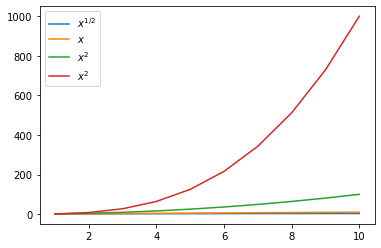

In [6]:
x = np.linspace(1, 10, 10)  # 10 points evenly between 1 and 10.
print(x)
plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When visualizing functions where $y$ has many different orders of magnitude, a logarithmic scale is useful:

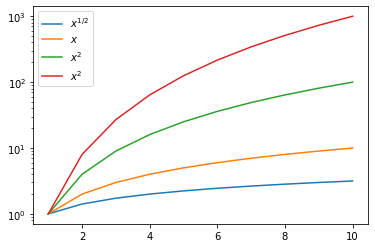

In [7]:
x = np.linspace(1, 10, 10)
plt.semilogy(x, x**0.5, label=r"$x^{1/2}$")
plt.semilogy(x, x**1, label=r"$x$")
plt.semilogy(x, x**2, label=r"$x^2$")
plt.semilogy(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

When also the $x$-axis contains many orders of magnitude, a log-log plot is most useful:

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06 1.e+07 1.e+08 1.e+09 1.e+10]


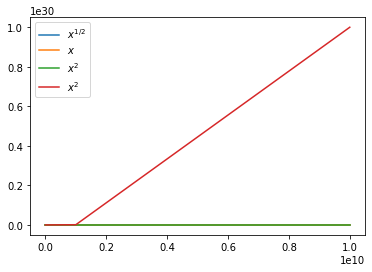

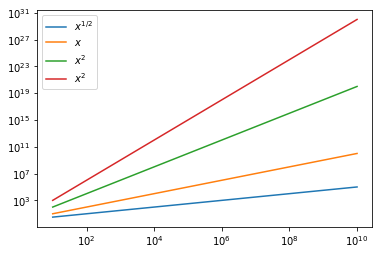

In [8]:
x = np.logspace(1, 10, 10, base=10)  # 10 points evenly between 10^1 and 10^10.
print(x)

plt.plot(x, x**0.5, label=r"$x^{1/2}$")
plt.plot(x, x**1, label=r"$x$")
plt.plot(x, x**2, label=r"$x^2$")
plt.plot(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

plt.loglog(x, x**0.5, label=r"$x^{1/2}$")
plt.loglog(x, x**1, label=r"$x$")
plt.loglog(x, x**2, label=r"$x^2$")
plt.loglog(x, x**3, label=r"$x^2$")
plt.legend()
plt.show()

-----
# Exercise 1
This exercise is a variant of exercise 1.6 in the book.

## (a) 
Lookup the Taylor series for $\cos(x)$ in the base point $0$. (You don't have to hand in the series expansion)
## (b) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **two** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

In [9]:
def taylor_cos(x, n_terms = 2):
    sign = -1
    out = 1
    for term in range(1, n_terms):
        out += sign * x ** (term * 2) / math.factorial(term * 2) #exp_fact_div(term * 2, x)
        sign *= -1
    return out

In [21]:
def error_taylor(n_terms):
    for x in [.2, 1, 2]:
        print(f'with {n_terms} non-zero terms and x = {x}')
        true = np.cos(x)
        approx = taylor_cos(x, n_terms)
        print('the absolute forward error is ', abs(true - approx))
        print('the relative forward error is ', abs(true - approx) / true)
        print('the absolute backward error is', abs(x - math.acos(approx)))
        print('the relative backward error is', abs(x - math.acos(approx)) / x)
        print()

In [22]:
error_taylor(2)

with 2 non-zero terms and x = 0.2
the absolute forward error is  6.657784124164401e-05
the relative forward error is  6.793195763117715e-05
the absolute backward error is 0.00033484232311967177
the relative backward error is 0.0016742116155983588

with 2 non-zero terms and x = 1
the absolute forward error is  0.040302305868139765
the relative forward error is  0.07459214115953727
the absolute backward error is 0.04719755119659785
the relative backward error is 0.04719755119659785

with 2 non-zero terms and x = 2
the absolute forward error is  0.5838531634528576
the relative forward error is  -1.4029979617223811
the absolute backward error is 1.1415926535897931
the relative backward error is 0.5707963267948966



TODO: de antwoorden staan hierboven, maar het moet nog uitgelegd en uitgeschreven worden in $\LaTeX$

## (c) (0.5 pt)
What are the forward and backward errors if we approximate $\cos(x)$ by the first **three** nonzero terms in the Taylor series at $x = 0.2$, $x = 1.0$ and $x = 2.0$?

In [23]:
error_taylor(3)

with 3 non-zero terms and x = 0.2
the absolute forward error is  8.882542501531532e-08
the relative forward error is  9.063203156153735e-08
the absolute backward error is 4.4710234142764094e-07
the relative backward error is 2.2355117071382047e-06

with 3 non-zero terms and x = 1
the absolute forward error is  0.0013643607985268646
the relative forward error is  0.0025251804105012195
the absolute backward error is 0.0016222452979235413
the relative backward error is 0.0016222452979235413

with 3 non-zero terms and x = 2
the absolute forward error is  0.08281350321380904
the relative forward error is  -0.19900067942587296
the absolute backward error is 0.0893667637509814
the relative backward error is 0.0446833818754907



TODO: de antwoorden staan hierboven, maar het moet nog uitgelegd en uitgeschreven worden in $\LaTeX$

## (d) (1 pt)
Compute the relative condition of $x \mapsto \cos(x)$ at $x = 0.2$, $x=1.0$ and $x=2.0$.

TODO: deze heb ik nog niet gedaan

# Exercise 2

This exercise is about computing the sum of a set of $n$ random numbers. You are asked to implement different ways to compute the sum. To be able to compare rounding errors for the different methods, all sums have to be executed in single precision (some hints are above), and implemented by yourself, unless specifically mentioned. The result of each sum can then be compared with a reference implementation that employs the standard double precision format.

Vary $n$ by choosing different powers of 10 at least up to, say, $10^7$.

## (a)
Create a function that returns an array of $n$ single precision random numbers (here denoted by $x_1$, $i=1, \ldots, n$), uniformly distributed in the interval $[0,1]$. You may use a suitable function from `numpy.random`.

Create a function to sum the numbers using double precision computations in the order they are generated. 

In [11]:
def sp_random(n):
    return np.single(np.random.uniform(0, 1, n))

In [12]:
# TODO: ik weet niet of dit de bedoeling is of de sum weer naar een single
#       gecast moet worden op het eind. als het naar een single gecast wordt
#       dan wordt de loglog plot heel raar...
def dp_sum(lst): 
    return np.sum(np.double(lst))
    # return np.single(np.sum(np.double(lst))) # dit is de naar single gecaste versie

## (b) (a+b together 2 pts)
Create a function to sum the numbers in the order in which they were generated, this time using single-precision computations. Visualize the errors as a function of $n$ using a log-log plot.

In [13]:
def sp_sum(lst):
    return np.sum(lst)

In [14]:
def plot_error(sum_1, sum_2, label, sort = False, dec = False):
    x = [10 ** idx for idx in range(9)]
    errors = []
    for n in x:
        lst = sp_random(n)
        if sort:
            lst = np.sort(lst)
        if dec:
            lst = lst[::-1]
            
        errors.append(abs(sum_1(lst) - sum_2(lst)))
    
    plt.loglog(x, errors, label = label)
    plt.xlabel('number of random samples')
    plt.ylabel('absolute error')
    plt.title('log-log plot of the absolute error of summing n single-precision \nuniformly distributed random samples with different methods')

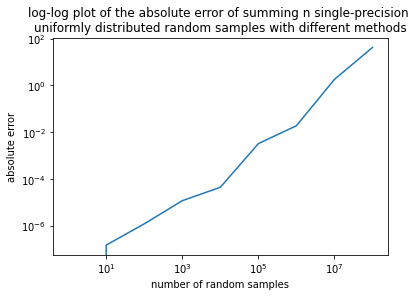

In [15]:
plot_error(dp_sum, sp_sum, 'double vs. single precision')

## (c) (1.5 pts)
Use the following compensated summation algorithm (due to Kahan), again using only single precision, to sum the numbers in the order in which they were generated:

<img src="Kahan_alg.png"
     width=200>
 
(algorithm at https://canvas.uva.nl/files/7499123/download?download_frd=1)

Plot the error as a function of $n$.

In [16]:
def kahan_sum(x):
    s = np.single(x[0])
    c = np.single(0)
    for i in range(1, len(x)):
        y = x[i] - c
        t = s + y
        c = (t - s) - y
        s = t
    return s

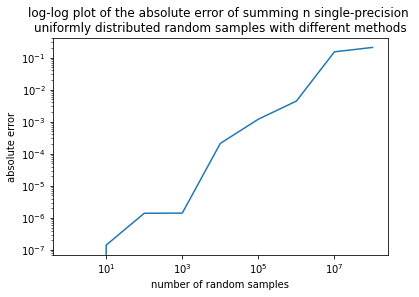

In [17]:
plot_error(dp_sum, kahan_sum, 'double vs. single Kahan sum precision')

## (d) (1.5 pts)
Sum the numbers in increasing order of magnitude and plot the error. Sum the numbers in decreasing order of magnitude and plot the error. You may use a `sort` function from NumPy or some other package. (You don't need to use the Kahan sums here.)

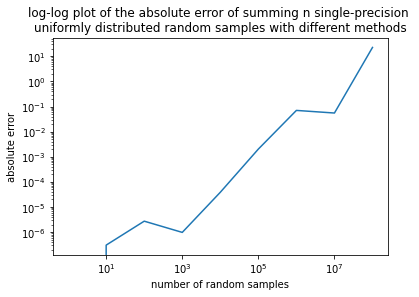

In [18]:
plot_error(dp_sum, sp_sum, 'double vs. single precision increasing', sort = True)

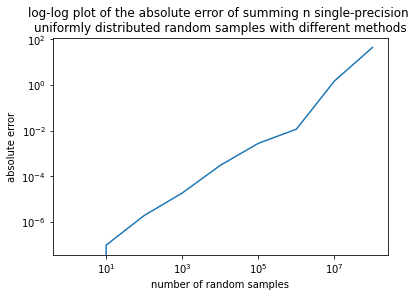

In [19]:
plot_error(dp_sum, sp_sum, 'double vs. single Kahan sum precision decreasing', sort = True, dec = True)

## (e) (2 pts)
How do the methods rank in terms of accuracy? Can you explain the differences? Can you explain why the method of Kahan works? 
N.B.1 be precise in your explanations. Try to explain the size of any errors that are not incurred as well as of errors that are encurred.
N.B.2 you are required to formulate an answer in text. You may also add computations if you feel this helps in the explanations.

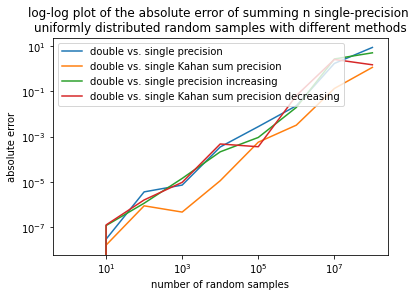

In [20]:
plot_error(dp_sum, sp_sum, 'double vs. single precision')
plot_error(dp_sum, kahan_sum, 'double vs. single Kahan sum precision')
plot_error(dp_sum, sp_sum, 'double vs. single precision increasing', sort = True)
plot_error(dp_sum, sp_sum, 'double vs. single Kahan sum precision decreasing', sort = True, dec = True)
plt.legend()

TODO: deze vraag moet nog beantwoord worden